In [19]:
# import libraries
import os
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest



# set `<your-endpoint>` and `<your-key>` variables with the values from the Azure portal
endpoint = os.getenv("AZURE_DOC_INT_ENDPOINT")
key = os.getenv("AZURE_DOC_INT_KEY")

def analyze_invoice():
    # sample document

    invoiceUrl = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/sample-invoice.pdf"

    document_intelligence_client = DocumentIntelligenceClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    poller = document_intelligence_client.begin_analyze_document(
        "prebuilt-invoice", AnalyzeDocumentRequest(url_source=invoiceUrl)
    )
    invoices = poller.result()

    if invoices.documents:
        for idx, invoice in enumerate(invoices.documents):
            print(f"--------Analyzing invoice #{idx + 1}--------")
            vendor_name = invoice.fields.get("VendorName")
            if vendor_name:
                print(
                    f"Vendor Name: {vendor_name.get('content')} has confidence: {vendor_name.get('confidence')}"
                )
            vendor_address = invoice.fields.get("VendorAddress")
            if vendor_address:
                print(
                    f"Vendor Address: {vendor_address.get('content')} has confidence: {vendor_address.get('confidence')}"
                )
            vendor_address_recipient = invoice.fields.get("VendorAddressRecipient")
            if vendor_address_recipient:
                print(
                    f"Vendor Address Recipient: {vendor_address_recipient.get('content')} has confidence: {vendor_address_recipient.get('confidence')}"
                )
            customer_name = invoice.fields.get("CustomerName")
            if customer_name:
                print(
                    f"Customer Name: {customer_name.get('content')} has confidence: {customer_name.get('confidence')}"
                )
            customer_id = invoice.fields.get("CustomerId")
            if customer_id:
                print(
                    f"Customer Id: {customer_id.get('content')} has confidence: {customer_id.get('confidence')}"
                )
            customer_address = invoice.fields.get("CustomerAddress")
            if customer_address:
                print(
                    f"Customer Address: {customer_address.get('content')} has confidence: {customer_address.get('confidence')}"
                )
            customer_address_recipient = invoice.fields.get("CustomerAddressRecipient")
            if customer_address_recipient:
                print(
                    f"Customer Address Recipient: {customer_address_recipient.get('content')} has confidence: {customer_address_recipient.get('confidence')}"
                )
            invoice_id = invoice.fields.get("InvoiceId")
            if invoice_id:
                print(
                    f"Invoice Id: {invoice_id.get('content')} has confidence: {invoice_id.get('confidence')}"
                )
            invoice_date = invoice.fields.get("InvoiceDate")
            if invoice_date:
                print(
                    f"Invoice Date: {invoice_date.get('content')} has confidence: {invoice_date.get('confidence')}"
                )
            invoice_total = invoice.fields.get("InvoiceTotal")
            if invoice_total:
                print(
                    f"Invoice Total: {invoice_total.get('content')} has confidence: {invoice_total.get('confidence')}"
                )
            due_date = invoice.fields.get("DueDate")
            if due_date:
                print(
                    f"Due Date: {due_date.get('content')} has confidence: {due_date.get('confidence')}"
                )
            purchase_order = invoice.fields.get("PurchaseOrder")
            if purchase_order:
                print(
                    f"Purchase Order: {purchase_order.get('content')} has confidence: {purchase_order.get('confidence')}"
                )
            billing_address = invoice.fields.get("BillingAddress")
            if billing_address:
                print(
                    f"Billing Address: {billing_address.get('content')} has confidence: {billing_address.get('confidence')}"
                )
            billing_address_recipient = invoice.fields.get("BillingAddressRecipient")
            if billing_address_recipient:
                print(
                    f"Billing Address Recipient: {billing_address_recipient.get('content')} has confidence: {billing_address_recipient.get('confidence')}"
                )
            shipping_address = invoice.fields.get("ShippingAddress")
            if shipping_address:
                print(
                    f"Shipping Address: {shipping_address.get('content')} has confidence: {shipping_address.get('confidence')}"
                )
            shipping_address_recipient = invoice.fields.get("ShippingAddressRecipient")
            if shipping_address_recipient:
                print(
                    f"Shipping Address Recipient: {shipping_address_recipient.get('content')} has confidence: {shipping_address_recipient.get('confidence')}"
                )
            print("Invoice items:")
            for idx, item in enumerate(invoice.fields.get("Items").get("valueArray")):
                print(f"...Item #{idx + 1}")
                item_description = item.get("valueObject").get("Description")
                if item_description:
                    print(
                        f"......Description: {item_description.get('content')} has confidence: {item_description.get('confidence')}"
                    )
                item_quantity = item.get("valueObject").get("Quantity")
                if item_quantity:
                    print(
                        f"......Quantity: {item_quantity.get('content')} has confidence: {item_quantity.get('confidence')}"
                    )
                unit = item.get("valueObject").get("Unit")
                if unit:
                    print(
                        f"......Unit: {unit.get('content')} has confidence: {unit.get('confidence')}"
                    )
                unit_price = item.get("valueObject").get("UnitPrice")
                if unit_price:
                    unit_price_code = (
                        unit_price.get("valueCurrency").get("currencyCode")
                        if unit_price.get("valueCurrency").get("currencyCode")
                        else ""
                    )
                    print(
                        f"......Unit Price: {unit_price.get('content')}{unit_price_code} has confidence: {unit_price.get('confidence')}"
                    )
                product_code = item.get("valueObject").get("ProductCode")
                if product_code:
                    print(
                        f"......Product Code: {product_code.get('content')} has confidence: {product_code.get('confidence')}"
                    )
                item_date = item.get("valueObject").get("Date")
                if item_date:
                    print(
                        f"......Date: {item_date.get('content')} has confidence: {item_date.get('confidence')}"
                    )
                tax = item.get("valueObject").get("Tax")
                if tax:
                    print(
                        f"......Tax: {tax.get('content')} has confidence: {tax.get('confidence')}"
                    )
                amount = item.get("valueObject").get("Amount")
                if amount:
                    print(
                        f"......Amount: {amount.get('content')} has confidence: {amount.get('confidence')}"
                    )
            subtotal = invoice.fields.get("SubTotal")
            if subtotal:
                print(
                    f"Subtotal: {subtotal.get('content')} has confidence: {subtotal.get('confidence')}"
                )
            total_tax = invoice.fields.get("TotalTax")
            if total_tax:
                print(
                    f"Total Tax: {total_tax.get('content')} has confidence: {total_tax.get('confidence')}"
                )
            previous_unpaid_balance = invoice.fields.get("PreviousUnpaidBalance")
            if previous_unpaid_balance:
                print(
                    f"Previous Unpaid Balance: {previous_unpaid_balance.get('content')} has confidence: {previous_unpaid_balance.get('confidence')}"
                )
            amount_due = invoice.fields.get("AmountDue")
            if amount_due:
                print(
                    f"Amount Due: {amount_due.get('content')} has confidence: {amount_due.get('confidence')}"
                )
            service_start_date = invoice.fields.get("ServiceStartDate")
            if service_start_date:
                print(
                    f"Service Start Date: {service_start_date.get('content')} has confidence: {service_start_date.get('confidence')}"
                )
            service_end_date = invoice.fields.get("ServiceEndDate")
            if service_end_date:
                print(
                    f"Service End Date: {service_end_date.get('content')} has confidence: {service_end_date.get('confidence')}"
                )
            service_address = invoice.fields.get("ServiceAddress")
            if service_address:
                print(
                    f"Service Address: {service_address.get('content')} has confidence: {service_address.get('confidence')}"
                )
            service_address_recipient = invoice.fields.get("ServiceAddressRecipient")
            if service_address_recipient:
                print(
                    f"Service Address Recipient: {service_address_recipient.get('content')} has confidence: {service_address_recipient.get('confidence')}"
                )
            remittance_address = invoice.fields.get("RemittanceAddress")
            if remittance_address:
                print(
                    f"Remittance Address: {remittance_address.get('content')} has confidence: {remittance_address.get('confidence')}"
                )
            remittance_address_recipient = invoice.fields.get(
                "RemittanceAddressRecipient"
            )
            if remittance_address_recipient:
                print(
                    f"Remittance Address Recipient: {remittance_address_recipient.get('content')} has confidence: {remittance_address_recipient.get('confidence')}"
                )


          #print("----------------------------------------");


if __name__ == "__main__":
    analyze_invoice()

--------Analyzing invoice #1--------
Vendor Name: CONTOSO LTD. has confidence: 0.937
Vendor Address: 123 456th St
New York, NY, 10001 has confidence: 0.887
Vendor Address Recipient: Contoso Headquarters has confidence: 0.938
Customer Name: MICROSOFT CORPORATION has confidence: 0.918
Customer Id: CID-12345 has confidence: 0.967
Customer Address: 123 Other St,
Redmond WA, 98052 has confidence: 0.888
Customer Address Recipient: Microsoft Corp has confidence: 0.933
Invoice Id: INV-100 has confidence: 0.971
Invoice Date: 11/15/2019 has confidence: 0.971
Invoice Total: $110.00 has confidence: 0.969
Due Date: 12/15/2019 has confidence: 0.971
Purchase Order: PO-3333 has confidence: 0.966
Billing Address: 123 Bill St,
Redmond WA, 98052 has confidence: 0.889
Billing Address Recipient: Microsoft Finance has confidence: 0.938
Shipping Address: 123 Ship St,
Redmond WA, 98052 has confidence: 0.888
Shipping Address Recipient: Microsoft Delivery has confidence: 0.937
Invoice items:
...Item #1
......De

In [5]:
"""
This code sample shows Prebuilt Receipt operations with the Azure Form Recognizer client library. 
The async versions of the samples require Python 3.6 or later.

To learn more, please visit the documentation - Quickstart: Document Intelligence (formerly Form Recognizer) SDKs
https://learn.microsoft.com/azure/ai-services/document-intelligence/quickstarts/get-started-sdks-rest-api?pivots=programming-language-python
"""

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

"""
Remember to remove the key from your code when you're done, and never post it publicly. For production, use
secure methods to store and access your credentials. For more information, see 
https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-security?tabs=command-line%2Ccsharp#environment-variables-and-application-configuration
"""
endpoint = "https://doc-inteligence-east.cognitiveservices.azure.com/"
key = ""

# sample document
url = "https://raw.githubusercontent.com/Azure/azure-sdk-for-python/main/sdk/formrecognizer/azure-ai-formrecognizer/tests/sample_forms/receipt/contoso-receipt.png"

document_analysis_client = DocumentAnalysisClient(
    endpoint=endpoint, credential=AzureKeyCredential(key)
)

poller = document_analysis_client.begin_analyze_document_from_url("prebuilt-receipt", url)
receipts = poller.result()

for idx, receipt in enumerate(receipts.documents):
    print("--------Recognizing receipt #{}--------".format(idx + 1))
    receipt_type = receipt.doc_type
    if receipt_type:
        print(
            "Receipt Type: {}".format(receipt_type)
        )
    merchant_name = receipt.fields.get("MerchantName")
    if merchant_name:
        print(
            "Merchant Name: {} has confidence: {}".format(
                merchant_name.value, merchant_name.confidence
            )
        )
    transaction_date = receipt.fields.get("TransactionDate")
    if transaction_date:
        print(
            "Transaction Date: {} has confidence: {}".format(
                transaction_date.value, transaction_date.confidence
            )
        )
    if receipt.fields.get("Items"):
        print("Receipt items:")
        for idx, item in enumerate(receipt.fields.get("Items").value):
            print("...Item #{}".format(idx + 1))
            item_description = item.value.get("Description")
            if item_description:
                print(
                    "......Item Description: {} has confidence: {}".format(
                        item_description.value, item_description.confidence
                    )
                )
            item_quantity = item.value.get("Quantity")
            if item_quantity:
                print(
                    "......Item Quantity: {} has confidence: {}".format(
                        item_quantity.value, item_quantity.confidence
                    )
                )
            item_price = item.value.get("Price")
            if item_price:
                print(
                    "......Individual Item Price: {} has confidence: {}".format(
                        item_price.value, item_price.confidence
                    )
                )
            item_total_price = item.value.get("TotalPrice")
            if item_total_price:
                print(
                    "......Total Item Price: {} has confidence: {}".format(
                        item_total_price.value, item_total_price.confidence
                    )
                )
    subtotal = receipt.fields.get("Subtotal")
    if subtotal:
        print(
            "Subtotal: {} has confidence: {}".format(
                subtotal.value, subtotal.confidence
            )
        )
    tax = receipt.fields.get("TotalTax")
    if tax:
        print("Tax: {} has confidence: {}".format(tax.value, tax.confidence))
    tip = receipt.fields.get("Tip")
    if tip:
        print("Tip: {} has confidence: {}".format(tip.value, tip.confidence))
    total = receipt.fields.get("Total")
    if total:
        print("Total: {} has confidence: {}".format(total.value, total.confidence))
    print("--------------------------------------")


ModuleNotFoundError: No module named 'azure.ai.formrecognizer'

In [2]:
!pip install azure.core


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install azure-ai-documentintelligence


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# invoices: 

In [ ]:
"""
This code sample shows Prebuilt Invoice operations with the Azure Form Recognizer client library. 
The async versions of the samples require Python 3.6 or later.

To learn more, please visit the documentation - Quickstart: Document Intelligence (formerly Form Recognizer) SDKs
https://learn.microsoft.com/azure/ai-services/document-intelligence/quickstarts/get-started-sdks-rest-api?pivots=programming-language-python
"""

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

"""
Remember to remove the key from your code when you're done, and never post it publicly. For production, use
secure methods to store and access your credentials. For more information, see 
https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-security?tabs=command-line%2Ccsharp#environment-variables-and-application-configuration
"""
endpoint = "YOUR_FORM_RECOGNIZER_ENDPOINT"
key = "YOUR_FORM_RECOGNIZER_KEY"

# sample document
formUrl = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/invoice_sample.jpg"

document_analysis_client = DocumentAnalysisClient(
    endpoint=endpoint, credential=AzureKeyCredential(key)
)
    
poller = document_analysis_client.begin_analyze_document_from_url("prebuilt-invoice", formUrl)
invoices = poller.result()

for idx, invoice in enumerate(invoices.documents):
    print("--------Recognizing invoice #{}--------".format(idx + 1))
    vendor_name = invoice.fields.get("VendorName")
    if vendor_name:
        print(
            "Vendor Name: {} has confidence: {}".format(
                vendor_name.value, vendor_name.confidence
            )
        )
    vendor_address = invoice.fields.get("VendorAddress")
    if vendor_address:
        print(
            "Vendor Address: {} has confidence: {}".format(
                vendor_address.value, vendor_address.confidence
            )
        )
    vendor_address_recipient = invoice.fields.get("VendorAddressRecipient")
    if vendor_address_recipient:
        print(
            "Vendor Address Recipient: {} has confidence: {}".format(
                vendor_address_recipient.value, vendor_address_recipient.confidence
            )
        )
    customer_name = invoice.fields.get("CustomerName")
    if customer_name:
        print(
            "Customer Name: {} has confidence: {}".format(
                customer_name.value, customer_name.confidence
            )
        )
    customer_id = invoice.fields.get("CustomerId")
    if customer_id:
        print(
            "Customer Id: {} has confidence: {}".format(
                customer_id.value, customer_id.confidence
            )
        )
    customer_address = invoice.fields.get("CustomerAddress")
    if customer_address:
        print(
            "Customer Address: {} has confidence: {}".format(
                customer_address.value, customer_address.confidence
            )
        )
    customer_address_recipient = invoice.fields.get("CustomerAddressRecipient")
    if customer_address_recipient:
        print(
            "Customer Address Recipient: {} has confidence: {}".format(
                customer_address_recipient.value,
                customer_address_recipient.confidence,
            )
        )
    invoice_id = invoice.fields.get("InvoiceId")
    if invoice_id:
        print(
            "Invoice Id: {} has confidence: {}".format(
                invoice_id.value, invoice_id.confidence
            )
        )
    invoice_date = invoice.fields.get("InvoiceDate")
    if invoice_date:
        print(
            "Invoice Date: {} has confidence: {}".format(
                invoice_date.value, invoice_date.confidence
            )
        )
    invoice_total = invoice.fields.get("InvoiceTotal")
    if invoice_total:
        print(
            "Invoice Total: {} has confidence: {}".format(
                invoice_total.value, invoice_total.confidence
            )
        )
    due_date = invoice.fields.get("DueDate")
    if due_date:
        print(
            "Due Date: {} has confidence: {}".format(
                due_date.value, due_date.confidence
            )
        )
    purchase_order = invoice.fields.get("PurchaseOrder")
    if purchase_order:
        print(
            "Purchase Order: {} has confidence: {}".format(
                purchase_order.value, purchase_order.confidence
            )
        )
    billing_address = invoice.fields.get("BillingAddress")
    if billing_address:
        print(
            "Billing Address: {} has confidence: {}".format(
                billing_address.value, billing_address.confidence
            )
        )
    billing_address_recipient = invoice.fields.get("BillingAddressRecipient")
    if billing_address_recipient:
        print(
            "Billing Address Recipient: {} has confidence: {}".format(
                billing_address_recipient.value,
                billing_address_recipient.confidence,
            )
        )
    shipping_address = invoice.fields.get("ShippingAddress")
    if shipping_address:
        print(
            "Shipping Address: {} has confidence: {}".format(
                shipping_address.value, shipping_address.confidence
            )
        )
    shipping_address_recipient = invoice.fields.get("ShippingAddressRecipient")
    if shipping_address_recipient:
        print(
            "Shipping Address Recipient: {} has confidence: {}".format(
                shipping_address_recipient.value,
                shipping_address_recipient.confidence,
            )
        )
    print("Invoice items:")
    for idx, item in enumerate(invoice.fields.get("Items").value):
        print("...Item #{}".format(idx + 1))
        item_description = item.value.get("Description")
        if item_description:
            print(
                "......Description: {} has confidence: {}".format(
                    item_description.value, item_description.confidence
                )
            )
        item_quantity = item.value.get("Quantity")
        if item_quantity:
            print(
                "......Quantity: {} has confidence: {}".format(
                    item_quantity.value, item_quantity.confidence
                )
            )
        unit = item.value.get("Unit")
        if unit:
            print(
                "......Unit: {} has confidence: {}".format(
                    unit.value, unit.confidence
                )
            )
        unit_price = item.value.get("UnitPrice")
        if unit_price:
            print(
                "......Unit Price: {} has confidence: {}".format(
                    unit_price.value, unit_price.confidence
                )
            )
        product_code = item.value.get("ProductCode")
        if product_code:
            print(
                "......Product Code: {} has confidence: {}".format(
                    product_code.value, product_code.confidence
                )
            )
        item_date = item.value.get("Date")
        if item_date:
            print(
                "......Date: {} has confidence: {}".format(
                    item_date.value, item_date.confidence
                )
            )
        tax = item.value.get("Tax")
        if tax:
            print(
                "......Tax: {} has confidence: {}".format(tax.value, tax.confidence)
            )
        amount = item.value.get("Amount")
        if amount:
            print(
                "......Amount: {} has confidence: {}".format(
                    amount.value, amount.confidence
                )
            )
    subtotal = invoice.fields.get("SubTotal")
    if subtotal:
        print(
            "Subtotal: {} has confidence: {}".format(
                subtotal.value, subtotal.confidence
            )
        )
    total_tax = invoice.fields.get("TotalTax")
    if total_tax:
        print(
            "Total Tax: {} has confidence: {}".format(
                total_tax.value, total_tax.confidence
            )
        )
    previous_unpaid_balance = invoice.fields.get("PreviousUnpaidBalance")
    if previous_unpaid_balance:
        print(
            "Previous Unpaid Balance: {} has confidence: {}".format(
                previous_unpaid_balance.value, previous_unpaid_balance.confidence
            )
        )
    amount_due = invoice.fields.get("AmountDue")
    if amount_due:
        print(
            "Amount Due: {} has confidence: {}".format(
                amount_due.value, amount_due.confidence
            )
        )
    service_start_date = invoice.fields.get("ServiceStartDate")
    if service_start_date:
        print(
            "Service Start Date: {} has confidence: {}".format(
                service_start_date.value, service_start_date.confidence
            )
        )
    service_end_date = invoice.fields.get("ServiceEndDate")
    if service_end_date:
        print(
            "Service End Date: {} has confidence: {}".format(
                service_end_date.value, service_end_date.confidence
            )
        )
    service_address = invoice.fields.get("ServiceAddress")
    if service_address:
        print(
            "Service Address: {} has confidence: {}".format(
                service_address.value, service_address.confidence
            )
        )
    service_address_recipient = invoice.fields.get("ServiceAddressRecipient")
    if service_address_recipient:
        print(
            "Service Address Recipient: {} has confidence: {}".format(
                service_address_recipient.value,
                service_address_recipient.confidence,
            )
        )
    remittance_address = invoice.fields.get("RemittanceAddress")
    if remittance_address:
        print(
            "Remittance Address: {} has confidence: {}".format(
                remittance_address.value, remittance_address.confidence
            )
        )
    remittance_address_recipient = invoice.fields.get("RemittanceAddressRecipient")
    if remittance_address_recipient:
        print(
            "Remittance Address Recipient: {} has confidence: {}".format(
                remittance_address_recipient.value,
                remittance_address_recipient.confidence,
            )
        )
    print("----------------------------------------")


# Documento de Identidade:

In [ ]:
"""
This code sample shows Prebuilt ID Document operations with the Azure Form Recognizer client library. 
The async versions of the samples require Python 3.6 or later.

To learn more, please visit the documentation - Quickstart: Document Intelligence (formerly Form Recognizer) SDKs
https://learn.microsoft.com/azure/ai-services/document-intelligence/quickstarts/get-started-sdks-rest-api?pivots=programming-language-python
"""

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

"""
Remember to remove the key from your code when you're done, and never post it publicly. For production, use
secure methods to store and access your credentials. For more information, see 
https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-security?tabs=command-line%2Ccsharp#environment-variables-and-application-configuration
"""
endpoint = "YOUR_FORM_RECOGNIZER_ENDPOINT"
key = "YOUR_FORM_RECOGNIZER_KEY"

# sample document
formUrl = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/DriverLicense.png"

document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )
    
poller = document_analysis_client.begin_analyze_document_from_url("prebuilt-idDocument", formUrl)
id_documents = poller.result()

for idx, id_document in enumerate(id_documents.documents):
    print("--------Recognizing ID document #{}--------".format(idx + 1))
    first_name = id_document.fields.get("FirstName")
    if first_name:
        print(
            "First Name: {} has confidence: {}".format(
                first_name.value, first_name.confidence
            )
        )
    last_name = id_document.fields.get("LastName")
    if last_name:
        print(
            "Last Name: {} has confidence: {}".format(
                last_name.value, last_name.confidence
            )
        )
    document_number = id_document.fields.get("DocumentNumber")
    if document_number:
        print(
            "Document Number: {} has confidence: {}".format(
                document_number.value, document_number.confidence
            )
        )
    dob = id_document.fields.get("DateOfBirth")
    if dob:
        print(
            "Date of Birth: {} has confidence: {}".format(dob.value, dob.confidence)
        )
    doe = id_document.fields.get("DateOfExpiration")
    if doe:
        print(
            "Date of Expiration: {} has confidence: {}".format(
                doe.value, doe.confidence
            )
        )
    sex = id_document.fields.get("Sex")
    if sex:
        print("Sex: {} has confidence: {}".format(sex.value, sex.confidence))
    address = id_document.fields.get("Address")
    if address:
        print(
            "Address: {} has confidence: {}".format(
                address.value, address.confidence
            )
        )
    country_region = id_document.fields.get("CountryRegion")
    if country_region:
        print(
            "Country/Region: {} has confidence: {}".format(
                country_region.value, country_region.confidence
            )
        )
    region = id_document.fields.get("Region")
    if region:
        print(
            "Region: {} has confidence: {}".format(region.value, region.confidence)
        )


In [18]:
import os
from dotenv import load_dotenv
load_dotenv()

class Config:
    ENDPOINT = os.getenv("AZURE_DOC_INT_ENDPOINT")
    KEY = os.getenv("AZURE_DOC_INT_KEY")
    AZURE_STORAGE_CONNECTION_STRING = os.getenv("AZURE_STORAGE_CONNECTION")
    CONTAINER_NAME = os.getenv("CONTAINER_NAME")

In [4]:
#pylint: disable=import-error,missing
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest
# from utils.Config import Config


def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
            "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    for document in result.documents:
        fields = document.get('fields', {})

        return {
            "card_name": fields.get('CardHolderName', {}).get('content'),
            "card_number": fields.get('CardNumber', {}).get('content'),
            "expiry_date": fields.get('ExpiryDate', {}).get('content'),
            "bank_name": fields.get('BankName', {}).get('content'),
        }

In [6]:
detect_credit_card_info("https://img.freepik.com/vetores-gratis/cartao-de-credito-com-efeito-de-vidro-realista_23-2149121586.jpg?t=st=1730745964~exp=1730749564~hmac=baede8e3da4216d71583b7c8052390b6c28d42d8095268f446e531efb0348e10&w=740")

{'card_name': 'CARDHOLDER NAME',
 'card_number': '5847 2514 9852 5401',
 'expiry_date': None,
 'bank_name': None}

In [9]:
def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
            "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    for document in result.documents:
        fields = document.get('fields', {})

        return fields

In [10]:
detect_credit_card_info("https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png")

{'CardHolderName': {'type': 'string', 'content': 'ADAM SMITH', 'boundingRegions': [{'pageNumber': 1, 'polygon': [167, 445, 365, 446, 365, 481, 167, 480]}], 'confidence': 0.995, 'spans': [{'offset': 50, 'length': 10}]},
 'CardNumber': {'type': 'string', 'content': '5412 1234 5656 8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [166, 313, 715, 313, 715, 357, 166, 357]}], 'confidence': 0.995, 'spans': [{'offset': 13, 'length': 19}]},
 'CardVerificationValue': {'type': 'string', 'content': '123', 'boundingRegions': [{'pageNumber': 1, 'polygon': [544, 784, 586, 785, 586, 811, 544, 810]}], 'confidence': 0.995, 'spans': [{'offset': 134, 'length': 3}]},
 'CustomerServicePhoneNumbers': {'type': 'array', 'valueArray': [{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 447, 627, 324, 627]}], 'spans': [{'offset': 99, 'length': 15}]}, {'type': 'string', 'valueString': '+1 200-000-8888', 'c

In [11]:
import pandas as pd
def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
            "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()
    return result

    

In [12]:
detect_credit_card_info("https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png")

{'apiVersion': '2024-07-31-preview', 'modelId': 'prebuilt-creditCard', 'stringIndexType': 'textElements', 'content': 'Contoso Bank\n5412 1234 5656 8888\nVALID\n01/28\nTHRU\nADAM SMITH\nmastercard\nFor customer servies, call +1 200-345-6789 or +1 200-000-8888\n123\nNOT VALID UNLESS SIGNED\nLorem ipsum dolor sit amet, consectetuer adipiscing elit, sed diam nonummy nibh euismod tincidunt ut laoreet dolore magna aliquam erat volutpat.', 'pages': [{'pageNumber': 1, 'angle': 0.1234821006655693, 'width': 896, 'height': 1120, 'unit': 'pixel', 'words': [{'content': 'Contoso', 'polygon': [171, 172, 349, 171, 349, 213, 170, 213], 'confidence': 0.994, 'span': {'offset': 0, 'length': 7}}, {'content': 'Bank', 'polygon': [371, 171, 475, 171, 475, 212, 371, 213], 'confidence': 0.993, 'span': {'offset': 8, 'length': 4}}, {'content': '5412', 'polygon': [166, 314, 283, 313, 282, 357, 166, 356], 'confidence': 0.99, 'span': {'offset': 13, 'length': 4}}, {'content': '1234', 'polygon': [314, 313, 422, 313, 4

In [15]:
import pandas as pd

def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
        "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    # Extract fields from the first document (assuming one card per image)
    fields = result.documents[0].get('fields', {})

    # Flatten the nested dictionary to a simple dictionary
    flattened_fields = {}
    for key, value in fields.items():
        if 'valueArray' in value:
            # Handle arrays of values
            flattened_fields[key] = [v['valueString'] for v in value['valueArray']]
        else:
            flattened_fields[key] = value['content']

    # Create a Pandas DataFrame from the flattened dictionary
    df = pd.DataFrame.from_dict(flattened_fields, orient='index', columns=['value'])

    return df

In [16]:
detect_credit_card_info("https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png")

,value
CardHolderName,ADAM SMITH
CardNumber,5412 1234 5656 8888
CardVerificationValue,123
CustomerServicePhoneNumbers,"[+1 200-345-6789, +1 200-000-8888]"
ExpirationDate,01/28
IssuingBank,Contoso Bank
PaymentNetwork,mastercard


In [ ]:
CardHolderName	
CardNumber	
CustomerServicePhoneNumbers
ExpirationDate	
IssuingBank	
PaymentNetwork	

In [17]:
import os
import sqlite3
from azure.storage.blob import BlobServiceClient
from azure.ai.documentintelligence import DocumentIntelligenceClient
import streamlit as st

ModuleNotFoundError: No module named 'azure.storage'

# 04-11-24: Desafio - Análise de Documentos Anti-Fraude - POC com Jupyter Lab e SQLite

## Cenário: Você, como desenvolvedor, foi designado para desenvolver um protótipo (POC) de um sistema de análise de documentos anti-fraude. O projeto já foi aprovado e você precisa entregar e apresentar a solução em no máximo 2 dias.

- **Requisitos:**

- Front-end: Streamlit para upload de imagens e visualização dos resultados.
- Back-end: Python com bibliotecas Azure SDK para interagir com o Azure Blob Storage e Azure Document Intelligence.
- Banco de dados: SQLite para armazenar os resultados da análise.
- Controle de versão: Git e GitHub para gerenciar o código.
- Gerenciamento de dependências: Poetry para gerenciar as bibliotecas do projeto.

**1. Configuração do ambiente:**

* [x] **Criar um ambiente virtual com Poetry:**
    ```bash
    poetry init -n
    poetry add azure-storage-blob azure-ai-documentintelligence azure-core streamlit sqlite3 python-dotenv requests
    ```
* [x] **Criar um repositório no GitHub:**
    * Acesse o GitHub e crie um novo repositório.
* [x] **Clonar o repositório localmente:**
    ```bash
    git clone <url do repositório>
    ```
* [x] **Ativar o ambiente virtual:**
    ```bash
    poetry shell
    ```

In [20]:
!poetry add azure-storage-blob

Using version ^12.23.1 for azure-storage-blob

Updating dependencies
Resolving dependencies... (2.0s)

Package operations: 2 installs, 0 updates, 0 removals

  • Installing cryptography (43.0.3): Pending...
  • Installing cryptography (43.0.3): Downloading... 0%
  • Installing cryptography (43.0.3): Downloading... 30%
  • Installing cryptography (43.0.3): Downloading... 90%
  • Installing cryptography (43.0.3): Downloading... 100%
  • Installing cryptography (43.0.3): Installing...
  • Installing cryptography (43.0.3)
  • Installing azure-storage-blob (12.23.1): Pending...
  • Installing azure-storage-blob (12.23.1): Downloading... 0%
  • Installing azure-storage-blob (12.23.1): Downloading... 100%
  • Installing azure-storage-blob (12.23.1): Installing...
  • Installing azure-storage-blob (12.23.1)

Writing lock file


**2. Criar o Jupyter Notebook:**

* **Criar um novo notebook no Jupyter Lab:**
    * Abra o Jupyter Lab e crie um novo notebook.
* **Importar as bibliotecas necessárias:**
    ```python
    import os
    import sqlite3
    from azure.storage.blob import BlobServiceClient
    from azure.ai.documentintelligence import DocumentIntelligenceClient
    import streamlit as st
    ```

In [1]:
import os
import sqlite3
from azure.storage.blob import BlobServiceClient
from azure.ai.documentintelligence import DocumentIntelligenceClient
import streamlit as st

* **Definir as credenciais do Azure Blob Storage e Azure Document Intelligence:**
    ```python
    # Credenciais do Azure Blob Storage
    CONNECTION_STRING = "<sua connection string>"
    CONTAINER_NAME = "<nome do container>"

    # Credenciais do Azure Document Intelligence
    ENDPOINT = "<endpoint do serviço>"
    API_KEY = "<chave de API>"
    ```

* **OBS:** É Necessário criar um arquivo `.env` na raiz do projeto com as variáveis acima.

* **Criar uma classe `Config`para Carregar as variáveis de ambiente com dotenv.**:

In [41]:
import os
from dotenv import load_dotenv
load_dotenv()

class Config:
    ENDPOINT = os.getenv("AZURE_DOC_INT_ENDPOINT")
    KEY = os.getenv("AZURE_DOC_INT_KEY")
    AZURE_STORAGE_CONNECTION_STRING = os.getenv("AZURE_STORAGE_CONNECTION")
    CONTAINER_NAME = os.getenv("CONTAINER_NAME")

**3. Criar a função de upload de imagens:**

* **Criar a interface de upload de imagens com Streamlit:**
    ```python
    def upload_blob(file, file_name):
        try:
            blob_service_client = BlobServiceClient.from_connection_string(Config.AZURE_STORAGE_CONNECTION_STRING)
            blob_client = blob_service_client.get_blob_client(container=Config.CONTAINER_NAME, blob=file_name)
            blob_client.upload_blob(file, overwrite=True)
            return blob_client.url
        except Exception as ex:
            st.error(f"Erro ao enviar o arquivo para o Azure Blob Storage: {ex}")
            return None
    ```

In [34]:
def upload_blob(file, file_name):
        try:
            blob_service_client = BlobServiceClient.from_connection_string(Config.AZURE_STORAGE_CONNECTION_STRING)
            blob_client = blob_service_client.get_blob_client(container=Config.CONTAINER_NAME, blob=file_name)
            blob_client.upload_blob(file, overwrite=True)
            return blob_client.url
        except Exception as ex:
            #st.error(f"Erro ao enviar o arquivo para o Azure Blob Storage: {ex}")
            return f"Erro ao enviar o arquivo para o Azure Blob Storage: {ex}"

In [35]:
upload_blob("desafios_de_projeto/desafio_2/data/cartao-pre-pago-standard", "cartao-pre-pago.jpg")

'https://stdiolab2.blob.core.windows.net/cartoes/cartao-pre-pago.jpg'

**Obs:** Aparentemente não funcionou ele entiva um arquivo em bytes e retorna uma url mas na prática não salva a imagem.

# Código mais robusto e com tratamento de erros.:

In [62]:
import os
from typing import Union, Tuple
from azure.storage.blob import BlobServiceClient, ContentSettings
#from utils.Config import Config

def upload_blob(file_path: str, file_name: str) -> Union[str, Tuple[bool, str]]:
    """
    Faz upload de um arquivo para o Azure Blob Storage.
    
    Args:
        file_path: Caminho local ou URL do arquivo
        file_name: Nome desejado para o arquivo no blob storage
        
    Returns:
        str: URL do blob se sucesso
        Tuple[bool, str]: (False, mensagem de erro) se falha
    """
    try:
        # Inicializa o cliente do blob storage
        blob_service_client = BlobServiceClient.from_connection_string(Config.AZURE_STORAGE_CONNECTION_STRING)
        blob_client = blob_service_client.get_blob_client(
            container=Config.CONTAINER_NAME,
            blob=file_name
        )

        # Define o content type baseado na extensão do arquivo
        content_type = None
        file_extension = os.path.splitext(file_name)[1].lower()
        if file_extension in ['.jpg', '.jpeg']:
            content_type = 'image/jpeg'
        elif file_extension == '.png':
            content_type = 'image/png'
        elif file_extension == '.gif':
            content_type = 'image/gif'
        elif file_extension == '.webp':
            content_type = 'image/webp'

        # Configura as propriedades do blob
        content_settings = ContentSettings(content_type=content_type) if content_type else None

        # Verifica se é uma URL ou arquivo local
        if file_path.startswith(('http://', 'https://')):
            import requests
            response = requests.get(file_path)
            response.raise_for_status()  # Levanta exceção para status codes de erro
            data = response.content
        else:
            with open(file_path, 'rb') as file:
                data = file.read()

        # Faz o upload
        blob_client.upload_blob(
            data,
            overwrite=True,
            content_settings=content_settings
        )

        return blob_client.url

    except FileNotFoundError:
        return False, f"Arquivo não encontrado: {file_path}"
    except requests.exceptions.RequestException as ex:
        return False, f"Erro ao baixar arquivo da URL: {str(ex)}"
    except Exception as ex:
        return False, f"Erro ao enviar o arquivo para o Azure Blob Storage: {str(ex)}"

In [63]:
upload_blob("https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-vertical.png", 'imgagem.png')

'https://stdiolab2.blob.core.windows.net/cartoes/imgagem.png'

**4. Criar a função de análise de documentos:**

* **Utilizar a biblioteca `azure-ai-documentintelligence` para analisar a imagem do cartão de crédito:**
    ```python
    def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
            "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    for document in result.documents:
        fields = document.get('fields', {})

        return {
            "card_name": fields.get('CardHolderName', {}).get('content'),
            "card_number": fields.get('CardNumber', {}).get('content'),
            "expiry_date": fields.get('ExpiryDate', {}).get('content'),
            "bank_name": fields.get('BankName', {}).get('content'),
        }
    ```

In [48]:
def detect_credit_card_info(card_url):
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
            "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    for document in result.documents:
        fields = document.get('fields', {})

        return {
            "card_name": fields.get('CardHolderName', {}).get('content'),
            "card_number": fields.get('CardNumber', {}).get('content'),
            "expiry_date": fields.get('ExpiryDate', {}).get('content'),
            "bank_name": fields.get('BankName', {}).get('content'),
        }

In [64]:
detect_credit_card_info("https://stdiolab2.blob.core.windows.net/cartoes/imgagem.png")

{'card_name': 'ADAM SMITH',
 'card_number': '4000 1234 5678 9012',
 'expiry_date': None,
 'bank_name': None}

In [86]:
from dataclasses import dataclass
from typing import Optional, Dict, Any
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest
#from utils.Config import Config

@dataclass
class CreditCardInfo:
    """
    Classe para armazenar informações do cartão de crédito.
    
    Attributes:
        card_name (str): Nome do titular do cartão
        card_number (str): Número do cartão
        expiry_date (str): Data de expiração
        bank_name (str): Nome do banco emissor
    """
    card_name: Optional[str] = None
    card_number: Optional[str] = None
    expiry_date: Optional[str] = None
    bank_name: Optional[str] = None

class CreditCardDetector:
    """Classe para detecção de informações de cartão de crédito usando Azure Document Intelligence."""
    
    # Modelo pré-construído para cartões de crédito
    CREDIT_CARD_MODEL = "prebuilt-creditCard"
    
    def __init__(self, endpoint: str, key: str):
        """
        Inicializa o detector de cartão de crédito.
        
        Args:
            endpoint (str): Endpoint do Azure Document Intelligence
            key (str): Chave de autenticação do Azure
            
        Raises:
            ValueError: Se endpoint ou key forem vazios/None
        """
        if not endpoint or not key:
            raise ValueError("Endpoint e key são obrigatórios")
            
        self.credential = AzureKeyCredential(key)
        self.client = DocumentIntelligenceClient(endpoint, self.credential)

    def _extract_field_content(self, fields: Dict[str, Any], field_name: str) -> Optional[str]:
        """
        Extrai o conteúdo de um campo específico do documento.
        
        Args:
            fields (Dict[str, Any]): Dicionário com os campos do documento
            field_name (str): Nome do campo a ser extraído
            
        Returns:
            Optional[str]: Conteúdo do campo ou None se não encontrado
        """
        return fields.get(field_name, {}).get('content')

    def _validate_url(self, url: str) -> bool:
        """
        Valida se a URL fornecida é válida.
        
        Args:
            url (str): URL da imagem do cartão
            
        Returns:
            bool: True se a URL é válida, False caso contrário
        """
        if not url:
            return False
        
        # Validação básica de URL
        return url.startswith(('http://', 'https://'))

    async def detect_credit_card_info(self, card_url: str) -> Optional[CreditCardInfo]:
        """
        Detecta informações de cartão de crédito a partir de uma URL de imagem.
        
        Args:
            card_url (str): URL da imagem do cartão de crédito
            
        Returns:
            Optional[CreditCardInfo]: Objeto com as informações do cartão ou None em caso de erro
            
        Raises:
            ValueError: Se a URL for inválida
            Exception: Para outros erros durante o processamento
        """
        try:
            # Valida a URL
            if not self._validate_url(card_url):
                raise ValueError("URL inválida fornecida")

            # Inicia a análise do documento
            poller = self.client.begin_analyze_document(
                self.CREDIT_CARD_MODEL, AnalyzeDocumentRequest(url_source=card_url)
            )
            
            # Aguarda e obtém o resultado
            result = poller.result()
            
            # Verifica se há documentos nos resultados
            if not result.documents:
                return None
                
            # Extrai os campos do primeiro documento
            fields = result.documents[0].fields
            
            # Retorna objeto CreditCardInfo com as informações extraídas
            return CreditCardInfo(
                card_name=self._extract_field_content(fields, 'CardHolderName'),
                card_number=self._extract_field_content(fields, 'CardNumber'),
                expiry_date=self._extract_field_content(fields, 'ExpiryDate'),
                bank_name=self._extract_field_content(fields, 'BankName')
            )
            
        except ValueError as ve:
            raise ValueError(f"Erro de validação: {str(ve)}")
        except Exception as ex:
            raise Exception(f"Erro ao processar cartão de crédito: {str(ex)}")

def create_credit_card_detector() -> CreditCardDetector:
    """
    Factory function para criar uma instância de CreditCardDetector.
    
    Returns:
        CreditCardDetector: Nova instância configurada
        
    Raises:
        ValueError: Se as configurações necessárias não estiverem disponíveis
    """
    if not Config.ENDPOINT or not Config.KEY:
        raise ValueError("Configurações de Azure Document Intelligence não encontradas")
        
    return CreditCardDetector(Config.ENDPOINT, Config.KEY)

# Exemplo de uso
async def example_usage():
    try:
        # Cria o detector
        detector = create_credit_card_detector()
        
        # Detecta informações do cartão
        card_info = await detector.detect_credit_card_info("https://exemplo.com/imagem_cartao.jpg")
        
        if card_info:
            print(f"Nome no cartão: {card_info.card_name}")
            print(f"Número do cartão: {card_info.card_number}")
            print(f"Data de expiração: {card_info.expiry_date}")
            print(f"Banco: {card_info.bank_name}")
        else:
            print("Nenhuma informação de cartão detectada")
            
    except ValueError as ve:
        print(f"Erro de validação: {ve}")
    except Exception as ex:
        print(f"Erro inesperado: {ex}")

# Documentação: Detector de Cartão de Crédito com Azure

## Índice
1. [Introdução](#introdução)
2. [O que é @dataclass?](#o-que-é-dataclass)
3. [Componentes do Sistema](#componentes-do-sistema)
4. [Como Funciona](#como-funciona)
5. [Configuração](#configuração)
6. [Como Usar](#como-usar)
7. [Exemplos Práticos](#exemplos-práticos)
8. [Tratamento de Erros](#tratamento-de-erros)
9. [Perguntas Frequentes](#perguntas-frequentes)

## Introdução

Este sistema foi desenvolvido para extrair informações de cartões de crédito a partir de imagens usando o serviço Azure Document Intelligence da Microsoft. É como ter um assistente que olha para a foto de um cartão de crédito e anota todas as informações importantes dele.

## O que é @dataclass?

### Explicação Simples
Imagine que você está organizando uma festa e precisa anotar informações dos convidados. Você poderia criar uma ficha com campos como nome, idade e telefone. O `@dataclass` é como um "modelo de ficha" no Python que facilita a criação dessas estruturas.

### Exemplo Prático
Sem @dataclass:
```python
class Convidado:
    def __init__(self, nome, idade, telefone):
        self.nome = nome
        self.idade = idade
        self.telefone = telefone
```

Com @dataclass:
```python
from dataclasses import dataclass

@dataclass
class Convidado:
    nome: str
    idade: int
    telefone: str
```

### Vantagens do @dataclass
1. **Menos código**: Você escreve menos e tem o mesmo resultado
2. **Mais organizado**: A estrutura fica mais clara e fácil de entender
3. **Automático**: Python cria automaticamente vários métodos úteis
4. **Tipagem**: Ajuda a prevenir erros indicando o tipo de cada campo

### No Nosso Código
Usamos @dataclass para criar a estrutura que guarda as informações do cartão:
```python
@dataclass
class CreditCardInfo:
    card_name: Optional[str] = None    # Nome no cartão
    card_number: Optional[str] = None  # Número do cartão
    expiry_date: Optional[str] = None  # Data de validade
    bank_name: Optional[str] = None    # Nome do banco
```

## Componentes do Sistema

### 1. CreditCardInfo (A Ficha)
- Guarda as informações extraídas do cartão
- Cada informação pode estar presente ou ser None (opcional)
- Campos são tipados para evitar erros

### 2. CreditCardDetector (O Detector)
- Classe principal que faz todo o trabalho
- Conecta com o Azure
- Processa a imagem
- Extrai as informações

### 3. Factory Function (O Criador)
- Função que prepara e configura o detector
- Verifica se tudo está correto antes de começar
- Facilita a criação de novas instâncias

## Como Funciona

1. **Preparação**:
   - Sistema se conecta ao Azure usando suas credenciais
   - Valida se a URL da imagem é válida

2. **Processamento**:
   - Envia a imagem para o Azure
   - Azure analisa a imagem usando IA
   - Extrai as informações do cartão

3. **Resultado**:
   - Organiza as informações encontradas
   - Retorna um objeto CreditCardInfo preenchido
   - Trata possíveis erros

## Configuração

### Pré-requisitos
1. Conta no Azure
2. Serviço Document Intelligence configurado
3. Python instalado
4. Bibliotecas necessárias

### Arquivo de Configuração
```python
# utils/Config.py
class Config:
    ENDPOINT = "sua_url_do_azure"
    KEY = "sua_chave_do_azure"
```

## Como Usar

### Uso Básico
```python
# 1. Importe o necessário
from seu_modulo import create_credit_card_detector

# 2. Crie o detector
detector = create_credit_card_detector()

# 3. Use o detector
async def processar_cartao():
    card_info = await detector.detect_credit_card_info("url_da_imagem")
    print(f"Nome no cartão: {card_info.card_name}")
```

### Uso Completo com Tratamento de Erros
```python
async def processar_cartao_seguro():
    try:
        # Criar detector
        detector = create_credit_card_detector()
        
        # Processar imagem
        card_info = await detector.detect_credit_card_info("url_da_imagem")
        
        # Verificar resultado
        if card_info:
            print("Informações encontradas:")
            print(f"Nome: {card_info.card_name}")
            print(f"Número: {card_info.card_number}")
            print(f"Validade: {card_info.expiry_date}")
            print(f"Banco: {card_info.bank_name}")
        else:
            print("Nenhuma informação encontrada")
            
    except ValueError as e:
        print(f"Erro de validação: {e}")
    except Exception as e:
        print(f"Erro inesperado: {e}")
```

## Exemplos Práticos

### Exemplo 1: Processamento Simples
```python
detector = create_credit_card_detector()
info = await detector.detect_credit_card_info("https://exemplo.com/cartao.jpg")
print(f"Cartão encontrado: {info.card_number}")
```

### Exemplo 2: Verificação Completa
```python
detector = create_credit_card_detector()
info = await detector.detect_credit_card_info("https://exemplo.com/cartao.jpg")

if info.card_name and info.card_number:
    print("Cartão válido encontrado!")
else:
    print("Informações incompletas")
```

## Tratamento de Erros

O sistema trata vários tipos de erros:

1. **Erros de Configuração**:
   - Credenciais ausentes
   - Configuração incorreta

2. **Erros de URL**:
   - URL inválida
   - Imagem inacessível

3. **Erros de Processamento**:
   - Falha na análise
   - Timeout
   - Problemas de rede

## Perguntas Frequentes

### 1. Por que usar async/await?
Para melhor performance com múltiplas requisições e para não travar o programa enquanto processa.

### 2. O sistema é seguro?
Sim, usa credenciais do Azure e validações de segurança.

### 3. Que tipos de imagem são aceitos?
JPG, PNG e outros formatos comuns de imagem.

### 4. Preciso de internet?
Sim, o sistema usa o Azure, que é um serviço online.

### 5. O que significa Optional[str]?
Significa que o campo pode ter um texto (str) ou ser vazio (None).

---

## Dicas de Uso

1. **Sempre trate erros**:
   ```python
   try:
       resultado = await detector.detect_credit_card_info(url)
   except Exception as e:
       print(f"Ops, algo deu errado: {e}")
   ```

2. **Verifique os resultados**:
   ```python
   if info.card_number:
       print("Número encontrado!")
   else:
       print("Número não encontrado")
   ```

3. **Use boas imagens**:
   - Boa iluminação
   - Sem reflexos
   - Cartão bem visível



In [87]:
detector = create_credit_card_detector()
info = await detector.detect_credit_card_info("https://stdiolab2.blob.core.windows.net/cartoes/imgagem.png")

if info.card_name and info.card_number:
    print("Cartão válido encontrado!")
else:
    print("Informações incompletas")

Cartão válido encontrado!


In [93]:
detector = create_credit_card_detector()
info = await detector.detect_credit_card_info("https://stdiolab2.blob.core.windows.net/cartoes/imgagem.png")
print(f"Cartão encontrado: {info.card_number}")

Cartão encontrado: 4000 1234 5678 9012


In [105]:
# Criar detector
detector = create_credit_card_detector()

# Processar imagem
card_info = await detector.detect_credit_card_info("https://stdiolab2.blob.core.windows.net/cartoes/imgagem.png")

# Verificar resultado
if card_info:
    print("Informações encontradas:")
    print(f"Nome: {card_info.card_name}")
    print(f"Número: {card_info.card_number}")
    print(f"Validade: {card_info.expiry_date}")
    print(f"Banco: {card_info.bank_name}")
else:
    print("Nenhuma informação encontrada")
    
    

Informações encontradas:
Nome: ADAM SMITH
Número: 4000 1234 5678 9012
Validade: None
Banco: None


<coroutine object processar_cartao_seguro at 0x7f18bad83840>

In [99]:
test.card_info

AttributeError: 'coroutine' object has no attribute 'card_info'

## 05/11/24: refatoração:

## Montei um cronograma para finalizar o desafio, vamos lá então!

**Vamos imaginar que comecei a trabalhar na empresa X e recebi a seguinte demanda:**

* **Você foi encarregado de criar uma Prova de Conceito (POC) para um projeto de validação de cartões de crédito. A empresa deseja adicionar uma funcionalidade para armazenar os dados dos cartões de crédito dos clientes em um banco de dados, que, para esta etapa inicial, pode ser um SQLite. Entretanto, antes de armazenar as informações, o sistema precisa validar se a imagem enviada pelo cliente realmente é de um cartão de crédito e se contém os seguintes dados: número do cartão, data de validade, nome do banco e nome do cliente.**

* **Por se tratar de uma POC, os dados capturados não serão tratados com foco na LGPD ou em outras medidas de segurança, pois essa responsabilidade será delegada a outra equipe em uma fase posterior. Seu objetivo, portanto, é entregar uma interface frontend onde o cliente possa fazer o upload de uma imagem do cartão de crédito para o Azure Blob Storage. Após o upload, o Azure fornecerá um link URL para a imagem, que será validada utilizando o serviço Azure.AI.DocumentIntelligence. Em seguida, os dados extraídos serão enviados ao banco de dados SQLite.**

* **O prazo para entrega da solução é de 2 dias.**

##  Sua Missão: Validar Cartões de Crédito com IA 

**O que você precisa fazer:**

1. **Criar um frontend simples:** Um sistema onde o cliente pode enviar uma imagem do seu cartão de crédito.
2. **Armazenar a imagem na nuvem:** Utilize o Azure Storage para guardar a imagem enviada e gerar um link URL para acessá-la.
3. **Extrair informações do cartão:** Implemente a validação usando o Azure Document Intelligence para identificar os dados do cartão, como número, data de validade, nome do banco e nome do cliente.
4. **Validar a imagem:**  Verifique se a imagem realmente corresponde a um cartão de crédito, analisando se todas as informações essenciais estão presentes.
5. **Armazenar os dados extraídos:** Utilize um banco de dados SQLite para armazenar os dados extraídos do cartão, mas lembre-se que este é apenas para fins de demonstração, a segurança de dados será tratada em uma etapa posterior.


## Cronograma para o Projeto: Validador de Cartões de Crédito

**Objetivo:** Entregar uma Prova de Conceito (POC) funcional do validador de cartões de crédito em 2 dias.

**Tempo:** 2 dias (48 horas)

**Equipes:** 1 Desenvolvedor

**Checklist Geral:**

[ ] Frontend (Interface do Usuário)
[ ] Azure Storage (Armazenamento de Imagem)
[ ] Azure Document Intelligence (Extração de Informações)
[ ] Validação da Imagem
[ ] Banco de Dados SQLite (Armazenamento de Dados)
[ ] Documentação e Apresentação

### Dia 1:

**Manhã (9h - 12h):**

**Tarefa 1: Configuração do Ambiente**

* [ ] Configurar ambiente de desenvolvimento (Jupyter Lab/IDE) e criar projeto.
* [ ] Instalar bibliotecas necessárias (Streamlit, Azure SDK, SQLite).
* [ ] Criar arquivo de configurações para credenciais do Azure.
* [ ] Criar banco de dados SQLite.

**Tarefa 2: Frontend (Interface do Usuário)**

* [ ] Criar layout simples com Streamlit:
    * [ ] Opção de upload de arquivo de imagem.
    * [ ] Botão para iniciar a validação.
    * [ ] Área para exibir o resultado da validação.
* [ ] Adicionar instruções para o usuário.

**Tarde (14h - 17h):**

**Tarefa 3: Upload e Armazenamento na Nuvem**

* [ ] Implementar upload de imagem para o Azure Storage:
    * [ ] Criar função para conectar ao Azure Storage.
    * [ ] Criar função para fazer o upload da imagem.
    * [ ] Gerar URL da imagem no Azure Storage.
* [ ] Exibir a URL da imagem na interface.

**Tarefa 4: Extração de Informações**

* [ ] Implementar a extração de informações do cartão:
    * [ ] Criar função para conectar ao Azure Document Intelligence.
    * [ ] Criar função para analisar a imagem do cartão.
    * [ ] Extrair informações do cartão (número, data de validade, nome do banco, nome do cliente).

### Dia 2:

**Manhã (9h - 12h):**

**Tarefa 5: Validação da Imagem**

* [ ] Criar função para validar as informações extraídas:
    * [ ] Verificar se todas as informações essenciais foram extraídas.
    * [ ] Validar o formato dos dados (número do cartão, data, etc.).
* [ ] Exibir na interface o resultado da validação: 
    * [ ] Mensagem de sucesso se a validação for bem-sucedida.
    * [ ] Mensagem de erro caso contrário.

**Tarefa 6: Armazenamento dos Dados**

* [ ] Implementar a função para armazenar os dados no SQLite:
    * [ ] Criar tabela no banco de dados SQLite para armazenar os dados extraídos.
    * [ ] Criar função para inserir as informações extraídas no banco de dados.

**Tarde (14h - 17h):**

**Tarefa 7: Testes e Documentação**

* [ ] Testar a POC com diferentes imagens de cartão de crédito.
* [ ] Revisar o código e corrigir erros.
* [ ] Criar documentação da POC:
    * [ ] Descrição da funcionalidade.
    * [ ] Instruções de uso.
    * [ ] Arquivos de código.
    * [ ] Diagrama da arquitetura.

**Tarefa 8: Apresentação**

* [ ] Preparar uma apresentação concisa da POC, destacando as funcionalidades e os desafios encontrados.
* [ ] Apresentar a POC para a equipe, demonstrando o funcionamento do sistema.


### Dia 1:

**Manhã (9h - 12h):**

**Tarefa 1: Configuração do Ambiente**

* [x] Configurar ambiente de desenvolvimento (Jupyter Lab/IDE) e criar projeto.
* [x] Instalar bibliotecas necessárias (Streamlit, Azure SDK, SQLite).
* [x] Criar arquivo de configurações para credenciais do Azure.
* [x] Criar banco de dados SQLite.

**1. Configuração do ambiente:**

* [x] **Criar um ambiente virtual com Poetry:**
    ```bash
    poetry init -n
    poetry add azure-storage-blob azure-ai-documentintelligence azure-core streamlit sqlite3 python-dotenv requests
    ```
* [x] **Criar um repositório no GitHub:**
    * Acesse o GitHub e crie um novo repositório.
* [x] **Clonar o repositório localmente:**
    ```bash
    git clone <url do repositório>
    ```
* [x] **Ativar o ambiente virtual:**
    ```bash
    poetry shell
    ```

- [x] **Criar arquivo de configurações para as credenciais do Azure:**

In [39]:
# src/utils/Config.py 
from dotenv import load_dotenv 
import os 
load_dotenv() 
class Config: 
    # Azure Document Intelligence 
    ENDPOINT =  os.getenv("AZURE_DOC_INT_ENDPOINT")
    KEY = os.getenv("AZURE_DOC_INT_KEY")
    # Azure Blob Storoge
    STORAGE_CONNECTION = os.getenv("AZURE_STORAGE_CONNECTION")
    CONTAINER_NAME = os.getenv("CONTAINER_NAME")
    # SQLite
    DATABASE_PATH = "desafio_2/data/cards.db"

* * **Vale lembrar que já existe um arquivo `.env` na raiz do projeto com as variáveis e seus respectivos dados de forma parcialmente segura.**
  * **Estou criando todos os módulos do projeto aqui no jupyter para futuramente usar como uma documentação.**  

* **Criar a pasta utils na do projeto:**

In [59]:
!mkdir desafio_2/src/utils

* **Agora vamos enviar a célular abaixo como Config.py na pasta utils:**

In [4]:
%%writefile  src/utils/Config.py 
from dotenv import load_dotenv 
import os 
load_dotenv() 
class Config: 
    # Azure Document Intelligence 
    ENDPOINT =  os.getenv("AZURE_DOC_INT_ENDPOINT")
    KEY = os.getenv("AZURE_DOC_INT_KEY")
    # Azure Blob Storoge
    STORAGE_CONNECTION = os.getenv("AZURE_STORAGE_CONNECTION")
    CONTAINER_NAME = os.getenv("CONTAINER_NAME")
    # SQLite
    DATABASE_PATH = "data/cards.db"

Overwriting src/utils/Config.py


* [x] **Criar banco de dados SQLite.**:

In [1]:
# src/services/data_base.py
import sqlite3
from typing import Dict, List, Optional
from src.utils.Config import Config 

class DataBase:
    def __init__(self):
        self.db_path = Config.DATABASE_PATH
        # self._create_table()
    
    def __init__(self):
        self.db_path = Config.DATABASE_PATH
        
        with sqlite3.connect(self.db_path) as conn:
            # Criar a tabela se não existir
            cursor = conn.cursor()
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS credit_cards (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    card_name TEXT,
                    card_number TEXT,
                    expiry_date TEXT,
                    bank_name TEXT,
                    is_valid TEXT,
                    processed_at TEXT
                )
            ''')
            conn.commit()
    
    def _execute_query(self, query: str, params: tuple = None) -> sqlite3.Cursor:
        """Executa uma query SQL."""
        with sqlite3.connect(self.db_path) as conn:
            cursor = conn.cursor()
            if params:
                cursor.execute(query, params)
            else:
                cursor.execute(query)
            conn.commit()
            return cursor
    
    def insert_card(self, card_info: Dict[str, str]) -> int:
        """Insere um novo cartão no banco."""
        query = '''
        INSERT INTO credit_cards (
            card_name, card_number, expiry_date, 
            bank_name, is_valid, processed_at
        ) VALUES (?, ?, ?, ?, ?, ?)
        '''
        cursor = self._execute_query(query, (
            card_info['card_name'],
            card_info['card_number'],
            card_info['expiry_date'],
            card_info['bank_name'],
            card_info['is_valid'],
            card_info['processed_at']
        ))
        return cursor.lastrowid
    
    def get_all_cards(self) -> List[Dict[str, str]]:
        """Retorna todos os cartões."""
        query = "SELECT * FROM credit_cards"
        cursor = self._execute_query(query)
        columns = [desc[0] for desc in cursor.description]
        return [dict(zip(columns, row)) for row in cursor.fetchall()]
    
    def get_card_by_id(self, card_id: int) -> Optional[Dict[str, str]]:
        """Retorna um cartão específico."""
        query = "SELECT * FROM credit_cards WHERE id = ?"
        cursor = self._execute_query(query, (card_id,))
        row = cursor.fetchone()
        if row:
            columns = [desc[0] for desc in cursor.description]
            return dict(zip(columns, row))
        return None
    
    def update_card(self, card_id: int, card_info: Dict[str, str]) -> bool:
        """Atualiza um cartão existente."""
        query = '''
        UPDATE credit_cards
        SET card_name = ?, card_number = ?, expiry_date = ?,
            bank_name = ?, is_valid = ?, processed_at = ?
        WHERE id = ?
        '''
        cursor = self._execute_query(query, (
            card_info['card_name'],
            card_info['card_number'],
            card_info['expiry_date'],
            card_info['bank_name'],
            card_info['is_valid'],
            card_info['processed_at'],
            card_id
        ))
        return cursor.rowcount > 0
    
    def delete_card(self, card_id: int) -> bool:
        """Deleta um cartão."""
        query = "DELETE FROM credit_cards WHERE id = ?"
        cursor = self._execute_query(query, (card_id,))
        return cursor.rowcount > 0

* **Vamos criar a tabela e realizar alguns testes para garantir:**:

1- instanciar a classe e criar o banco caso não exista na path adicionado no Config: 

In [2]:
db = DataBase()

2-  Inserir um novo cartão:

In [4]:
card_info = {
    'card_name': 'João da Silva',
    'card_number': '1234567890123456',
    'expiry_date': '12/25',
    'bank_name': 'Banco do Brasil',
    'is_valid': 'True',
    'processed_at': '2023-10-26T10:00:00'
}
card_id = db.insert_card(card_info)
print(f"Cartão inserido com ID: {card_id}")

Cartão inserido com ID: 1


3- Obter todos os cartões:

In [5]:
cards = db.get_all_cards()
print("Todos os cartões:")
for card in cards:
    print(card)

Todos os cartões:
{'id': 1, 'card_name': 'João da Silva', 'card_number': '1234567890123456', 'expiry_date': '12/25', 'bank_name': 'Banco do Brasil', 'is_valid': 'True', 'processed_at': '2023-10-26T10:00:00'}


4- Atualizar um cartão existente:

In [6]:
card_info['card_name'] = 'Maria da Silva'
updated = db.update_card(1, card_info)
print(f"Cartão atualizado: {updated}")

Cartão atualizado: True


5- Conferir se o cartão foi atualizado:

In [7]:
cards = db.get_all_cards()
print("Todos os cartões:")
for card in cards:
    print(card)

Todos os cartões:
{'id': 1, 'card_name': 'Maria da Silva', 'card_number': '1234567890123456', 'expiry_date': '12/25', 'bank_name': 'Banco do Brasil', 'is_valid': 'True', 'processed_at': '2023-10-26T10:00:00'}


6- Deletar um cartão: 

In [8]:
deleted = db.delete_card(1)
print(f"Cartão deletado: {deleted}")

Cartão deletado: True


* **Aparentemente o código está funcional**

* **Vamos criar a pasta services que irá acomodar nosso scritpy data_base.py:**

In [9]:
!mkdir src/services

* **Agora vamos enviar o script para pasta services.**:

In [11]:
%%writefile src/services/data_base.py
import sqlite3
from typing import Dict, List, Optional
from src.utils.Config import Config 

class DataBase:
    def __init__(self):
        self.db_path = Config.DATABASE_PATH
        # self._create_table()
    
    def __init__(self):
        self.db_path = Config.DATABASE_PATH
        
        with sqlite3.connect(self.db_path) as conn:
            # Criar a tabela se não existir
            cursor = conn.cursor()
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS credit_cards (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    card_name TEXT,
                    card_number TEXT,
                    expiry_date TEXT,
                    bank_name TEXT,
                    is_valid TEXT,
                    processed_at TEXT
                )
            ''')
            conn.commit()
    
    def _execute_query(self, query: str, params: tuple = None) -> sqlite3.Cursor:
        """Executa uma query SQL."""
        with sqlite3.connect(self.db_path) as conn:
            cursor = conn.cursor()
            if params:
                cursor.execute(query, params)
            else:
                cursor.execute(query)
            conn.commit()
            return cursor
    
    def insert_card(self, card_info: Dict[str, str]) -> int:
        """Insere um novo cartão no banco."""
        query = '''
        INSERT INTO credit_cards (
            card_name, card_number, expiry_date, 
            bank_name, is_valid, processed_at
        ) VALUES (?, ?, ?, ?, ?, ?)
        '''
        cursor = self._execute_query(query, (
            card_info['card_name'],
            card_info['card_number'],
            card_info['expiry_date'],
            card_info['bank_name'],
            card_info['is_valid'],
            card_info['processed_at']
        ))
        return cursor.lastrowid
    
    def get_all_cards(self) -> List[Dict[str, str]]:
        """Retorna todos os cartões."""
        query = "SELECT * FROM credit_cards"
        cursor = self._execute_query(query)
        columns = [desc[0] for desc in cursor.description]
        return [dict(zip(columns, row)) for row in cursor.fetchall()]
    
    def get_card_by_id(self, card_id: int) -> Optional[Dict[str, str]]:
        """Retorna um cartão específico."""
        query = "SELECT * FROM credit_cards WHERE id = ?"
        cursor = self._execute_query(query, (card_id,))
        row = cursor.fetchone()
        if row:
            columns = [desc[0] for desc in cursor.description]
            return dict(zip(columns, row))
        return None
    
    def update_card(self, card_id: int, card_info: Dict[str, str]) -> bool:
        """Atualiza um cartão existente."""
        query = '''
        UPDATE credit_cards
        SET card_name = ?, card_number = ?, expiry_date = ?,
            bank_name = ?, is_valid = ?, processed_at = ?
        WHERE id = ?
        '''
        cursor = self._execute_query(query, (
            card_info['card_name'],
            card_info['card_number'],
            card_info['expiry_date'],
            card_info['bank_name'],
            card_info['is_valid'],
            card_info['processed_at'],
            card_id
        ))
        return cursor.rowcount > 0
    
    def delete_card(self, card_id: int) -> bool:
        """Deleta um cartão."""
        query = "DELETE FROM credit_cards WHERE id = ?"
        cursor = self._execute_query(query, (card_id,))
        return cursor.rowcount > 0

Writing src/services/data_base.py


* **Bom tarefa 1 concluída, agora vamos criar uma branch e enviar para o repositório e abir a `pr` para aprovação.**

In [13]:
!git checkout -b task1

Switched to a new branch 'task1'


* **Conferindo se a branch foi setada corretamente.**:

In [15]:
!git branch

  master
* task1


* **Verificando o status**: 

In [16]:
!git status

On branch task1
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    ../PoC_desafio2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	PoC_desafio2.ipynb
	data/cards.db
	src/

no changes added to commit (use "git add" and/or "git commit -a")


* **Adicionando ao staging todos os arquivos das pastas data e src**:

In [18]:
!git add data/* src/*

* **Realizando o commit**: 

In [19]:
!git commit -m "add: task1 finalizada!"

[task1 8101e93] add: task1 finalizada!
 3 files changed, 110 insertions(+)
 create mode 100644 desafios_de_projeto/desafio_2/data/cards.db
 create mode 100644 desafios_de_projeto/desafio_2/src/services/data_base.py
 create mode 100644 desafios_de_projeto/desafio_2/src/utils/Config.py


* **Enviando as alterações para o repositório github:** 

In [21]:
!git push origin task1

Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 24 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (11/11), 2.12 KiB | 1.06 MiB/s, done.
Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
remote: 
remote: Create a pull request for 'task1' on GitHub by visiting:
remote:      https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/pull/new/task1
remote: 
To https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102.git
 * [new branch]      task1 -> task1


* **Criando a Pull Request:**

![task1](img/pr_task1.jpg)

* **Maravilha agora é so criar a `pr` e partiu....🎆**
* **Só que não 😒. A `pr` não foi aprovada pelo CI implantado.** 

![task1_fail](img/pr_task1_fail.jpg)

* **E agora? KKKK 😂 😓.**
* **Vamos analisar clicando em detalhes**. 

![task1_details](img/pr_task1_detail.jpg)

* **erro de formatação como espaço em branco e algo como __init__ na linha 8 sem uso, algo desse tipo....**
* **Isso é ruim, mas importante para manter a padronização e qualidade, mas o que fazer?.**
* **Existem várias alternativas como acessar o código e resolver o problema, geralmente já existe um modelo de ambiente pré-configurado para você utilizar pela empresa, ou falar com seu chefe 🤭.**
* **Bom primeiro vou tentar resolver e depois irei comentar sobre algumas ferramentas que nos ajudam nessas horas.**

In [23]:
# vou utilizar o isort, black e flacke8 em conjunto: 
!task format src/services/data_base.py

Fixing /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/services/data_base.py
Fixing /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/utils/Config.py
Fixing /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/utils/.ipynb_checkpoints/Config-checkpoint.py
Skipping .ipynb files as Jupyter dependencies are not installed.
You can fix this by running ``pip install "black[jupyter]"``
reformatted /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/utils/Config.py
reformatted /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/services/data_base.py

All done! ✨ 🍰 ✨
2 files reformatted.
src/services/data_base.py:12:5: F811 redefinition of unused '__init__' from line 8
src/services/data_base.py:48:49: W291 tra

* **Veja que resultou no mesmo erro.**
* **Vou acessar o arquivo e corrigir o erro, basicamente removi o __init__ que estava repetido e na linha 48 removi o espaço em branco.**
* **Vamos veriricar se o erro foi corrido**.

In [29]:
!task format src/services/data_base.py

Skipping .ipynb files as Jupyter dependencies are not installed.
You can fix this by running ``pip install "black[jupyter]"``
All done! ✨ 🍰 ✨
2 files left unchanged.


In [31]:
!git add src/services/data_base.py

In [32]:
!git commit -m "fix task1"

[task1 e117c29] fix task1
 1 file changed, 42 insertions(+), 35 deletions(-)


In [33]:
!git push origin task1

Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 24 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (7/7), 754 bytes | 754.00 KiB/s, done.
Total 7 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102.git
   8101e93..e117c29  task1 -> task1


![task1_fix](img/pr_task1_fix.jpg)

* **Resolvido**.
* **O ideal é utilizar as 🛠 de acordo com as regras já preestabelecidas, nesse caso `isort, black e flake8` irei comentar brevemente sobre:**

**`isort`, `black` , `flake8` e `taskpy`: Ferramentas Essenciais para um Código Perfeito**

* **`isort`:** Organiza as importações de seu código, agrupando-as de acordo com as melhores práticas e seguindo uma ordem definida. Isso melhora a legibilidade e consistência do código.
* **`black`:** Formata automaticamente seu código Python, garantindo que o estilo seja consistente e que as convenções de estilo sejam seguidas. É uma ferramenta rigorosa e rápida, deixando você livre para se concentrar na lógica do código.
* **`flake8`:** Verifica seu código em busca de erros de sintaxe, erros de estilo e convenções de código que podem levar a problemas de manutenção. Ele também identifica código morto e possíveis problemas de segurança.

O `taskipy` é uma biblioteca Python que facilita a criação e a execução de tarefas automatizadas dentro de seus projetos. Ele permite definir e organizar tarefas complexas em arquivos de configuração simples, tornando o processo de desenvolvimento mais organizado e eficiente.

**Vantagens de usar `taskipy`:**

* **`taskpy`:** A grosso modo, ele cria um alias ao digitar **`task format`** executa as três verficicações **`isort`, `black` , `flake8`**.

* **Mas e se eu esquecer de executar o `task format` como ocorreu no meu casso em que eu enviei ao repositório github e ocorreu o erro?**.

* **Bom pra isso existe outra 🛠 , o `pre-commit`:

O `pre-commit` é uma ferramenta poderosa que automatiza a execução de hooks (ganchos) antes de cada commit no Git. Esses hooks são scripts que verificam seu código em busca de erros, estilo inconsistente, problemas de segurança, etc., antes de você enviar as alterações para o repositório.

**Importância do `pre-commit`:**

* **Garante a qualidade do código:** Detecta erros e problemas de estilo antes de o código ser enviado para o repositório, evitando que problemas sérios se propaguem.
* **Padroniza o código:** Assegura que todos os membros da equipe seguem as mesmas convenções de estilo, tornando o código mais consistente e legível.
* **Economiza tempo:** Automatiza tarefas repetitivas de formatação e verificação, liberando você para se concentrar em escrever código.
* **Melhora a colaboração:** Facilita a colaboração entre os desenvolvedores, pois todos podem ter certeza de que o código está sendo enviado com a qualidade desejada.
* **Detecta problemas de segurança:** Algumas ferramentas do `pre-commit` podem identificar vulnerabilidades de segurança no código, ajudando a construir software mais seguro.

### Em outro momento eu demosntro o funcionamento do `pre-commit` mas basicamente ele faz a verificação durante o commit e isso garante e nos obriga a correção antes mesmo de enviar ao github.
### Vou ficando por aqui, se gostaram fico grato com um voto de confiança ✅. Valeuuuuuu...  


# 06/11  Task 2:

**Tarefa 2: Frontend (Interface do Usuário)**

* [ ] Criar layout simples com Streamlit:
    * [ ] Opção de upload de arquivo de imagem.
    * [ ] Botão para iniciar a validação.
    * [ ] Área para exibir o resultado da validação.
* [ ] Adicionar instruções para o usuário.

* A cereja do bolo, irei realizar por último. 🍒.  

## Task 2:

*Tarefa 2: Upload e Armazenamento na Nuvem**

* [x] Implementar upload de imagem para o Azure Storage:
    * [x] Criar função para conectar ao Azure Storage.
    * [x] Criar função para fazer o upload da imagem.
    * [x] Gerar URL da imagem no Azure Storage.
* [x] Exibir a URL da imagem na interface.

## Implementar upload de imagem para o Azure Storage:

### 1.Criar função para conectar ao Azure Storage

* **Primeiro vamos carregar nossas variáveis de ambiente da Config.py**

In [1]:
from src.utils.Config import Config

* **Agora vamos conferir se a variável foi carregada corretamente**: 

In [3]:
Config.CONTAINER_NAME

'cartoes'

* **Perfeito, inclusive acima já respondo a questão de usar Dotenv é uma forma parcialmente segura de utilizar keys.**

* **Bom agora percisamos criar uma conexão com nosso azure storage vamos lá na documentação e vamos descobrir qual a forma mais simples de realizar essa conexão.**
* [documentação](https://learn.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?tabs=managed-identity%2Croles-azure-portal%2Csign-in-azure-cli&pivots=blob-storage-quickstart-scratch)

In [2]:
# importação da lib para conexão:  
from azure.storage.blob import BlobServiceClient

In [ ]:
BlobServiceClient.from_connection_string()

### Criando a conexão com  o blob storage da azure:

**BlobServiceClient.from_connection_string("nossa string de conexão")**

* **Exitem outras formas de criar a conexão mas vou usar essa que achei mais simples:**

* **BlobServiceClient : esse cara é a classe que irá criar nossa conexão para isso precisamos fornecer string de conexão que está na nossa variável Config.STORAGE_CONNECTION**    

In [3]:
# criando a conexão:
blob_service_client = BlobServiceClient.from_connection_string(Config.STORAGE_CONNECTION)

* **Certo agora vamos conferir se a conexão está ativa e verificar o que tenho no container.**:

In [20]:
# Verificano o que tenho dentro do meu container de nome cartão:
container_client = blob_service_client.get_container_client(container=Config.CONTAINER_NAME)
blob_list = container_client.list_blobs()
for blob in blob_list:
    print(f"Name: {blob.name}")

Name: 6dcbfb18-a936-45b6-96aa-18c97a780943.jpg
Name: 9ee8b449-afee-442c-a4e6-67c539031b50.png
Name: c0b2dbb7-f7b8-4745-a728-b0cc6a32297b.jpg
Name: cartao-pre-pago-standard.jpg
Name: credit-card-horizontal[1].png
Name: imgagem.png


* **Como podem ver a conexão foi criada com sucesso, pois foi possível listar todos os arquivos do container cartão.**

### 2.Criar função para fazer o upload da imagem.

* **Agora bora lá pra documentação e verificar qual a classe para realizar upload.**

* **Enviando um texto para um bloco do blob:**

In [21]:
# vamos testar este exemplo simples
blob_client = blob_service_client.get_blob_client(Config.CONTAINER_NAME, blob="teste_upload.txt")
data = b"Vamos enviar esse texto no nosso container pra ver o que acontece."

# Upload the blob data - default blob type is BlockBlob
blob_client.upload_blob(data, blob_type="BlockBlob")

{'etag': '"0x8DCFE76967847F9"',
 'last_modified': datetime.datetime(2024, 11, 6, 15, 20, 46, tzinfo=datetime.timezone.utc),
 'content_md5': bytearray(b'\x14\x03\x84\x96z\xd4\x8a\xea\x07\x15c7(\xd2I\xe5'),
 'client_request_id': '50428478-9c51-11ef-b397-7f38ab652918',
 'request_id': '068094c3-c01e-0089-475f-30d7c0000000',
 'version': '2024-11-04',
 'version_id': None,
 'date': datetime.datetime(2024, 11, 6, 15, 20, 46, tzinfo=datetime.timezone.utc),
 'request_server_encrypted': True,
 'encryption_key_sha256': None,
 'encryption_scope': None}

* **Recuperando o arquivo salvo no storage:**

In [24]:
blob_client = blob_service_client.get_blob_client(container=Config.CONTAINER_NAME, blob="teste_upload.txt")
# encoding param is necessary for readall() to return str, otherwise it returns bytes
downloader = blob_client.download_blob(max_concurrency=1, encoding='UTF-8')
blob_text = downloader.readall()
print(f"Blob contents: {blob_text}")

Blob contents: Vamos enviar esse texto no nosso container pra ver o que acontece.


* **Legal mas no nosso caso precisamos enviar uma imagem!**
* **Vamos experimentar e ver se o mesmo método funciona.**

In [8]:
blob_client = blob_service_client.get_blob_client(Config.CONTAINER_NAME, 'foto.png')
blob_client.upload_blob("data/cartao-pre-pago-standard.jpg", overwrite=True)
blob_client.url

'https://stdiolab2.blob.core.windows.net/cartoes/foto.png'

* **Aparentemente ele enviou o arquivo e retornou uma url da imagem.**
* **Vamos abrir a imagem para verificar**.

![img](https://stdiolab2.blob.core.windows.net/cartoes/foto.png)

* **Como o link não contém a imagem e muito menos o storage**.
* **Para que funcione corretamente, é necessário abrir o arquivo com with open primeiro para depois enviarmos para o storage.**

In [12]:
blob_client = blob_service_client.get_blob_client(Config.CONTAINER_NAME, 'foto.png')
# Upload the created file
with open(file="data/cartao-pre-pago-standard.jpg", mode="rb") as data:
    blob_client.upload_blob(data, overwrite=True)
blob_client.url

'https://stdiolab2.blob.core.windows.net/cartoes/foto.png'

![img](https://stdiolab2.blob.core.windows.net/cartoes/foto.png)

* **Perfeito! Agora precisamos criar uma função e salvar o script em src/services/blob_service.py**

In [56]:
# %%writefile src/services/blob_service.py
from azure.storage.blob import BlobServiceClient 
from src.utils.Config import Config 

def upload_to_blob(source, filename=None) -> str:
    """
    Faz o upload de uma imagem para o Azure Blob Storage

    Args:
        source: imagem com o caminho completo. ex:"img/imagem.png" 
        filename:Nome opcional para o arquivo.

    Returns: 
        str: URL do blob
    """ 
    if not filename:        
        file = source.split('.')[0].split('/')[-1]
        extension = source.split('.')[-1]
        filename = f"{file}.{extension}"
        
    # Upload para o blob
    blob_service_client = BlobServiceClient.from_connection_string(Config.STORAGE_CONNECTION)
    blob_client = blob_service_client.get_blob_client(Config.CONTAINER_NAME, filename)
    with open(file="data/cartao-pre-pago-standard.jpg", mode="rb") as data:
        blob_client.upload_blob(data, overwrite=True)
    return blob_client.url

Writing src/services/blob_service.py


* **Para desencargo de consciência vamos fazer um último teste:**

In [55]:
# Coloquei propositalmente sem o nome do arquivo para ver se será tratado corretamente pois eu deixei como opcional.
upload_to_blob("data/cartao-pre-pago-standard.jpg") 

'https://stdiolab2.blob.core.windows.net/cartoes/cartao-pre-pago-standard.jpg'

![img](https://stdiolab2.blob.core.windows.net/cartoes/cartao-pre-pago-standard.jpg)

### **Bom acho que ficou bem simples e prático, tentei reduzir ao máximo o código e não fiz nenhum tipo de tratamento para ficar o mais simples possível, pois acho que compliquei um pouco na tarefa 1 .😅.**

* **Mas calma aí, vamos fazer o commit e a PR para encerrarmos com chave de 🥇 essa tarefa.** 
* **Criar a branch da tarefa 2.**
* **Mas antes de tudo vamos verficar a qualidade do código para não sermos barrados na Pull Request como foi na task1 😓.**

In [68]:
!task format src/services/blob_service.py

Skipping .ipynb files as Jupyter dependencies are not installed.
You can fix this by running ``pip install "black[jupyter]"``
All done! ✨ 🍰 ✨
3 files left unchanged.


All done! ✨ 🍰 ✨

**Agora sim!.🎆

**Criar a branch task2**:

In [63]:
!git checkout -b task2

Switched to a new branch 'task2'


In [64]:
!git branch

  master
  task1
* task2


In [65]:
!git status

On branch task2
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   PoC_desafio2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	src/services/blob_service.py

no changes added to commit (use "git add" and/or "git commit -a")


**Adicionar ao stage e realizando o commit local.**

In [70]:
!git add src/services/blob_service.py

In [71]:
!git commit -m "add: task2 finalizada com sucesso!"

[task2 0b0ab68] add: task2 finalizada com sucesso!
 1 file changed, 29 insertions(+)
 create mode 100644 desafios_de_projeto/desafio_2/src/services/blob_service.py


**Enviando para o github.**

In [72]:
!git push origin task2

Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 24 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 1.02 KiB | 1.02 MiB/s, done.
Total 7 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: 
remote: Create a pull request for 'task2' on GitHub by visiting:
remote:      https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/pull/new/task2
remote: 
To https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102.git
 * [new branch]      task2 -> task2


**Abrindo a PR.**

![img](img/pr_task2_ok.jpg)

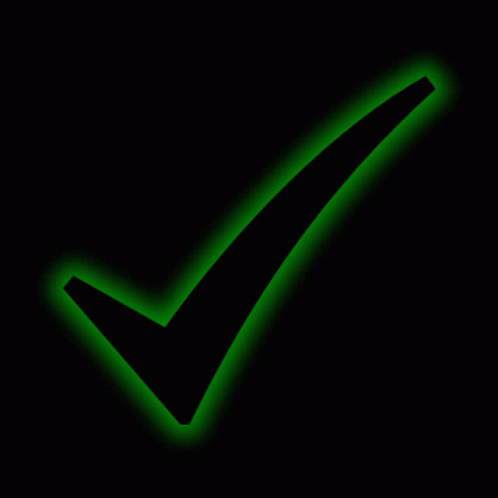

### Bom vou ficando por aqui, em breve estarei postando as  próximas tarefas, se gostaram não esqueçam de curtir! 🙏🏻 Fui.....🏃🏻‍➡️

# Task 3:

**Tarefa 3: Extração de Informações**

* [ ] Implementar a extração de informações do cartão:
    * [ ] Criar função para conectar ao Azure Document Intelligence.
    * [ ] Criar função para analisar a imagem do cartão.
    * [ ] Extrair informações do cartão (número, data de validade, nome do banco, nome do cliente).

## Implementar a extração de informações do cartão:

### Criar função para conectar ao Azure Document Intelligence.

**Borá lá na documentação?** 
**[Documentação](https://learn.microsoft.com/en-us/azure/ai-services/document-intelligence/quickstarts/get-started-sdks-rest-api?view=doc-intel-4.0.0&pivots=programming-language-python)**

* **Primeiro como de costume, vamos carregar as variáveis da Config.py.**:

In [1]:
from src.utils.Config import Config

* **Caregar a lib para conexão com a API do Documente Intelligence:**

In [2]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest

* **Vamos criar uma conexão de teste.**

In [4]:
credential = AzureKeyCredential(Config.KEY) 
document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential) 

* **Agora vamos realizar a primeira analise:**

In [7]:
card_info = document_client.begin_analyze_document(model_id="prebuilt-creditCard",analyze_request=AnalyzeDocumentRequest(url_source="https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png"))

* **Vamos analisar esse cartão:**

![cartao_exemplo](https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png)

* **Vamos verificar os resultados obtidos da imagem do cartão de exemplo:**

In [9]:
card_info.result().documents[0]

{'docType': 'creditCard', 'boundingRegions': [{'pageNumber': 1, 'polygon': [0, 0, 896, 0, 896, 1120, 0, 1120]}], 'fields': {'CardHolderName': {'type': 'string', 'content': 'ADAM SMITH', 'boundingRegions': [{'pageNumber': 1, 'polygon': [167, 445, 365, 446, 365, 481, 167, 480]}], 'confidence': 0.995, 'spans': [{'offset': 50, 'length': 10}]}, 'CardNumber': {'type': 'string', 'content': '5412 1234 5656 8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [166, 313, 715, 313, 715, 357, 166, 357]}], 'confidence': 0.995, 'spans': [{'offset': 13, 'length': 19}]}, 'CardVerificationValue': {'type': 'string', 'content': '123', 'boundingRegions': [{'pageNumber': 1, 'polygon': [544, 784, 586, 785, 586, 811, 544, 810]}], 'confidence': 0.995, 'spans': [{'offset': 134, 'length': 3}]}, 'CustomerServicePhoneNumbers': {'type': 'array', 'valueArray': [{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 

* **Funcionou, porém ele está trazendo muitas inforamções que são desnecessárias para o projeto, precisamos fazer alguns cortes.**

In [10]:
card_info.result().documents[0].get('fields',{})

{'CardHolderName': {'type': 'string', 'content': 'ADAM SMITH', 'boundingRegions': [{'pageNumber': 1, 'polygon': [167, 445, 365, 446, 365, 481, 167, 480]}], 'confidence': 0.995, 'spans': [{'offset': 50, 'length': 10}]},
 'CardNumber': {'type': 'string', 'content': '5412 1234 5656 8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [166, 313, 715, 313, 715, 357, 166, 357]}], 'confidence': 0.995, 'spans': [{'offset': 13, 'length': 19}]},
 'CardVerificationValue': {'type': 'string', 'content': '123', 'boundingRegions': [{'pageNumber': 1, 'polygon': [544, 784, 586, 785, 586, 811, 544, 810]}], 'confidence': 0.995, 'spans': [{'offset': 134, 'length': 3}]},
 'CustomerServicePhoneNumbers': {'type': 'array', 'valueArray': [{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 447, 627, 324, 627]}], 'spans': [{'offset': 99, 'length': 15}]}, {'type': 'string', 'valueString': '+1 200-000-8888', 'c

* **Vejam que as informações estão mais limpas, exemplo:**
* "CardHolderName": 
    * type -> tipo de dado
    * content -> valor do atributo
    * boundingRegions -> coordenadas de onde o resultado foi retirado da imagem.
    * confidence -> A confiança do modelo na extração do valor (quanto mais próximo de 1, mais preciso).
    * spans -> Informações sobre a localização do valor dentro do texto original.

* **O Ojetivo para esse exemplo é extrair apenas os atributos e valores dos resultados, mãos a obra.**

In [13]:
card_fields = card_info.result().documents[0].get('fields',{})
type(card_fields)

dict

* **Como se trata de um tipo de dicionário podemos percorrer chave e valor e extrair o necessário para o projeto.**

In [19]:
card_fields['CardHolderName']['content']

'ADAM SMITH'

In [34]:
card_fields.values()

dict_values([{'type': 'string', 'content': 'ADAM SMITH', 'boundingRegions': [{'pageNumber': 1, 'polygon': [167, 445, 365, 446, 365, 481, 167, 480]}], 'confidence': 0.995, 'spans': [{'offset': 50, 'length': 10}]}, {'type': 'string', 'content': '5412 1234 5656 8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [166, 313, 715, 313, 715, 357, 166, 357]}], 'confidence': 0.995, 'spans': [{'offset': 13, 'length': 19}]}, {'type': 'string', 'content': '123', 'boundingRegions': [{'pageNumber': 1, 'polygon': [544, 784, 586, 785, 586, 811, 544, 810]}], 'confidence': 0.995, 'spans': [{'offset': 134, 'length': 3}]}, {'type': 'array', 'valueArray': [{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 447, 627, 324, 627]}], 'spans': [{'offset': 99, 'length': 15}]}, {'type': 'string', 'valueString': '+1 200-000-8888', 'content': '+1 200-000-8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [4

* **Vamos criar um novo dicionário vazio e a medida que vamos iterando sobre as chaves e valores vamos adicionar a chave e o valor de content no dicionário.**

In [49]:
for chave, valor in card_fields.items():
    print(f"chave->{chave} : valor-> {valor}\n")
    

chave->CardHolderName : valor-> {'type': 'string', 'content': 'ADAM SMITH', 'boundingRegions': [{'pageNumber': 1, 'polygon': [167, 445, 365, 446, 365, 481, 167, 480]}], 'confidence': 0.995, 'spans': [{'offset': 50, 'length': 10}]}

chave->CardNumber : valor-> {'type': 'string', 'content': '5412 1234 5656 8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [166, 313, 715, 313, 715, 357, 166, 357]}], 'confidence': 0.995, 'spans': [{'offset': 13, 'length': 19}]}

chave->CardVerificationValue : valor-> {'type': 'string', 'content': '123', 'boundingRegions': [{'pageNumber': 1, 'polygon': [544, 784, 586, 785, 586, 811, 544, 810]}], 'confidence': 0.995, 'spans': [{'offset': 134, 'length': 3}]}

chave->CustomerServicePhoneNumbers : valor-> {'type': 'array', 'valueArray': [{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 447, 627, 324, 627]}], 'spans': [{'offset': 99, 'length': 15}]}, {'t

* **Temos um probleminha, a chave: `CustomerServicePhoneNumbers` possui um array com 2 valores:**

In [50]:
card_fields['CustomerServicePhoneNumbers']['valueArray']

[{'type': 'string', 'valueString': '+1 200-345-6789', 'content': '+1 200-345-6789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [324, 610, 447, 610, 447, 627, 324, 627]}], 'spans': [{'offset': 99, 'length': 15}]},
 {'type': 'string', 'valueString': '+1 200-000-8888', 'content': '+1 200-000-8888', 'boundingRegions': [{'pageNumber': 1, 'polygon': [471, 610, 594, 610, 594, 627, 471, 627]}], 'spans': [{'offset': 118, 'length': 15}]}]

* **Certamente existem formas melhores de resolver isso, mas vou fazer o que me vem a mente no momento.**
* **Vou criar uma condição onde existir um "valueArray" irei extair o valor de 'content'.**

In [62]:
#criar um dicionjário vazio:
result = {}
# percorrer sobre o dicionário
for key, value in card_fields.items():
    if "valueArray" in value:
        result[key] = [v['content'] for v in value["valueArray"]]
        # print(result)
    else:
        result[key] = value['content']
result
        

{'CardHolderName': 'ADAM SMITH',
 'CardNumber': '5412 1234 5656 8888',
 'CardVerificationValue': '123',
 'CustomerServicePhoneNumbers': ['+1 200-345-6789', '+1 200-000-8888'],
 'ExpirationDate': '01/28',
 'IssuingBank': 'Contoso Bank',
 'PaymentNetwork': 'mastercard'}

* **Vamos usar o pandas somente pra exibir em formato de tabela:**

In [67]:
import pandas as pd 
pd.DataFrame.from_dict(result, orient='index', columns=['value'])

,value
CardHolderName,ADAM SMITH
CardNumber,5412 1234 5656 8888
CardVerificationValue,123
CustomerServicePhoneNumbers,"[+1 200-345-6789, +1 200-000-8888]"
ExpirationDate,01/28
IssuingBank,Contoso Bank
PaymentNetwork,mastercard


* **Agora vamos criar a função, esse literalmente é uma passo a passo, pois estou dividindo todo o processo em pequenos blocos pra facilitar o entendimento.**

In [71]:
%%writefile src/services/credit_card_service.py
from src.utils.Config import Config
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest
import pandas as pd 

def detect_credit_card_info(card_url):
    """
    Extrai informações de um catão de crédito

    Args:
        card_url: url de uma imagem de cartão de crédito

    Return: 
        Um dataframe com as informações do cartão de crédito
    """
    credential = AzureKeyCredential(Config.KEY)
    document_client = DocumentIntelligenceClient(Config.ENDPOINT, credential)
    card_info = document_client.begin_analyze_document(
        "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=card_url)
    )
    result = card_info.result()

    # Extract fields from the first document (assuming one card per image)
    fields = result.documents[0].get('fields', {})

    # Flatten the nested dictionary to a simple dictionary
    result = {}
    for key, value in fields.items():
        if 'valueArray' in value:
            # Handle arrays of values
            result[key] = [v['valueString'] for v in value['valueArray']]
        else:
            result[key] = value['content']

    # Create a Pandas DataFrame from the flattened dictionary
    df = pd.DataFrame.from_dict(result, orient='index', columns=['value'])

    return df

Writing src/services/credit_card_service.py


In [70]:
detect_credit_card_info("https://documentintelligence.ai.azure.com/documents/samples/prebuilt/credit-card-horizontal.png")

,value
CardHolderName,ADAM SMITH
CardNumber,5412 1234 5656 8888
CardVerificationValue,123
CustomerServicePhoneNumbers,"[+1 200-345-6789, +1 200-000-8888]"
ExpirationDate,01/28
IssuingBank,Contoso Bank
PaymentNetwork,mastercard


* **Vamos verificar a qualidade e padronização do código.**

In [72]:
!task format src/services/credit_card_service.py

Fixing /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/services/credit_card_service.py
Skipping .ipynb files as Jupyter dependencies are not installed.
You can fix this by running ``pip install "black[jupyter]"``
reformatted /home/jcnok/bootcamps/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/desafios_de_projeto/desafio_2/src/services/credit_card_service.py

All done! ✨ 🍰 ✨
1 file reformatted, 3 files left unchanged.


All done! ✨ 🍰 ✨

* **Criar a branch para task3:**

In [73]:
!git checkout -b task3

Switched to a new branch 'task3'


* **Verificar se a branch task3 foi setada**:

In [75]:
!git branch 

  master
  task1
  task2
* task3


* **Adicionar ao stage e commitar:**

In [76]:
!git add src/services/credit_card_service.py 

In [77]:
!git commit -m "add: task3 finalizada com sucesso!"

[task3 60b641e] add: task3 finalizada com sucesso!
 1 file changed, 40 insertions(+)
 create mode 100644 desafios_de_projeto/desafio_2/src/services/credit_card_service.py


* **Enviar para o repositório remoto github:**

In [78]:
!git push origin task3

Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 24 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 1.20 KiB | 1.20 MiB/s, done.
Total 7 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: 
remote: Create a pull request for 'task3' on GitHub by visiting:
remote:      https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102/pull/new/task3
remote: 
To https://github.com/Jcnok/Bootcamp-Microsoft-Certification-Challenge--1-AI_102.git
 * [new branch]      task3 -> task3


* **Abrir a pull request da task3:**

![img](img/pr_task3_ok.jpg)
       

* **Merge realizad com sucesso!:**

![merge](img/pr_task3_merge.jpg)

### Bom pessoal, agora falta criar a aplicação com streamlit, basicamente vamos usar todos os módulos para concluir o desafio até lá....🫡! 
### Se acharem que o conteúdo é de valia, agradeço o feedback e um voto de confiança... 🙏🏻 valeu...